# Analysis of Movie genres across two decades

** Files used in this notebook for analysis:**<br>
    * ratings.csv : userId,movieId,rating, timestamp
    * movies.csv : movieId, title, genres
 Dataset link: http://files.grouplens.org/datasets/movielens/ml-20m.zip

#### Preparing files for the analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv("G:\edx_courses\python_for_data_science\Week_4_Pandas\Week-4-Pandas\Week-4-Pandas\movielens\movies.csv",sep =",")
ratings = pd.read_csv("G:/edx_courses/python_for_data_science/Week_4_Pandas/Week-4-Pandas/Week-4-Pandas/movielens/ratings.csv",sep =",")

In [4]:
movies.shape
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [5]:
ratings.shape
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [6]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [7]:
ratings['parsed_time'] =pd.to_datetime(ratings['timestamp'],unit='s')
min_yr = ratings['parsed_time'].dt.year.min()
max_yr = ratings['parsed_time'].dt.year.max()
print(f"start year:{min_yr} , end year:{max_yr}")

start year:1995 , end year:2015


In [8]:
movies['year'] = movies['title'].str.extract('.*\((\d+)\)',expand=True)

In [9]:
#applying filters for extracting movie data for the decade (1995 to 2005)
year_filter_2 = movies['year'] >='1995'
year_filter_3 = movies['year'] < '2005'
movies_before_2005 = movies[year_filter_2 & year_filter_3] 

In [10]:
movies_before_2005.shape

(5893, 4)

In [11]:
movies_before_2005.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [12]:
print("Minimum year: ",movies_before_2005['year'].min())
print("Maximum year: " ,movies_before_2005['year'].max())

Minimum year:  1995
Maximum year:  2004


In [13]:
#filtering for movies after 2005 upto 2015
year_filter = movies['year'] > '2005'
movies_after_2005 = movies[year_filter] 

In [14]:
movies_after_2005.shape

(8720, 4)

In [15]:
movies_after_2005.head()

,movieId,title,genres,year
9556,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,2006
10464,38188,Bubble (2006),Crime|Drama|Mystery,2006
10679,41863,"Three Burials of Melquiades Estrada, The (2006)",Adventure|Crime|Drama,2006
10750,42725,Grandma's Boy (2006),Comedy,2006
10751,42728,Tristan & Isolde (2006),Drama|Romance,2006


#### Exploring movies for their count and ratings

In [16]:
#counting for the movies from 1995 to 2004
movie_count_based_on_yr_1995_to_2004 = movies_before_2005[['movieId','year']].groupby('year').count()

In [17]:
movie_count_based_on_yr_1995_to_2004.shape

(10, 1)

In [18]:
movie_count_based_on_yr_1995_to_2004

,movieId
year,
1995,474
1996,509
1997,528
1998,555
1999,542
2000,613
2001,633
2002,678
2003,655


Text(0.5,1,'Number of movies produced during 1995_2004')

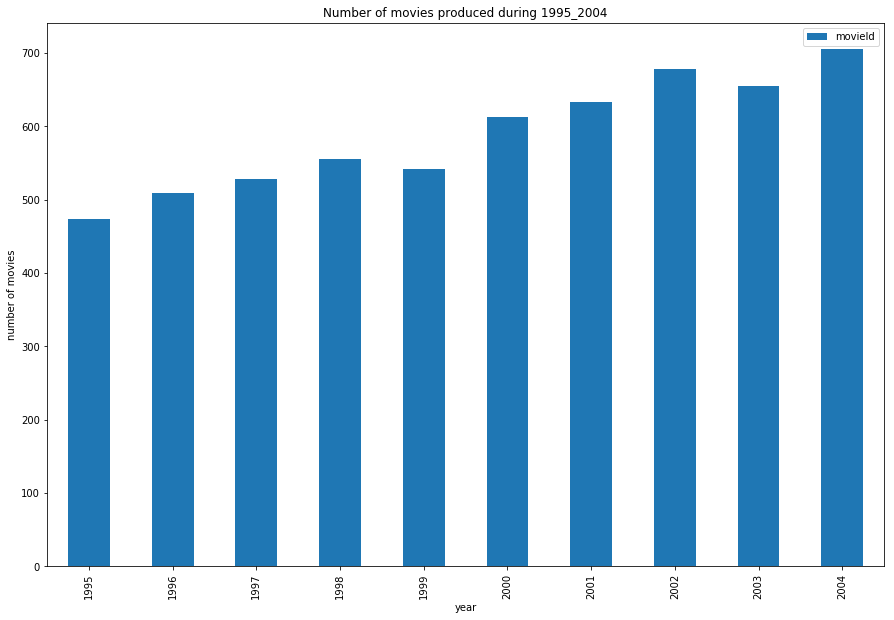

In [69]:
movie_count_based_on_yr_1995_to_2004.plot(kind='bar',figsize=(15,10))
plt.ylabel("number of movies")
plt.title("Number of movies produced during 1995_2004")

In [20]:
#counting movies for the year 2005 to 2015
movie_count_based_on_yr_2005_2015 = movies_after_2005[['movieId','year']].groupby('year').count()

In [21]:
movie_count_based_on_yr_2005_2015.shape

(10, 1)

In [22]:
movie_count_based_on_yr_2005_2015

,movieId
year,
2006,855
2007,902
2008,979
2009,1113
2010,962
2011,1016
2012,1022
2013,1011
2014,740


Text(0.5,1,'Number of movies produced during 2005_2015')

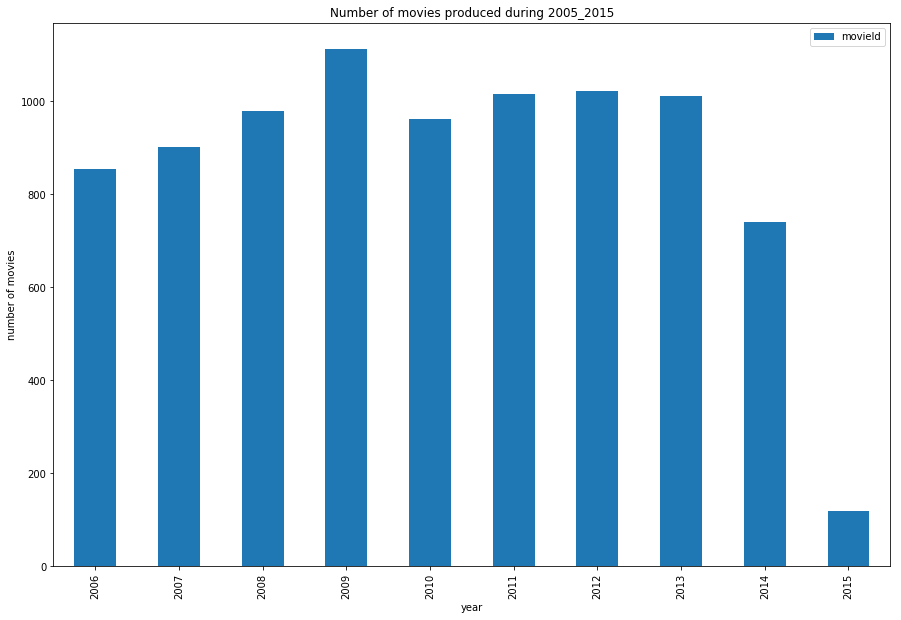

In [70]:
movie_count_based_on_yr_2005_2015.plot(kind='bar',figsize=(15,10))
plt.ylabel("number of movies")
plt.title("Number of movies produced during 2005_2015")

According to this dataset,the highest number of movies have been created in the year 2009

####  Merging ratings file with movies inorder to get ratings for the movies. This includes calculating mean rating and rating counts for each movies 

In [24]:
movies_1995_2004_with_ratings = movies_before_2005.merge(ratings,on = 'movieId', how='inner')

In [25]:
movies_1995_2004_with_ratings.shape

(8613879, 8)

In [26]:
movies_1995_2004_with_ratings.drop(['userId','timestamp'],axis=1,inplace=True)

In [27]:
movies_1995_2004_with_ratings.columns

Index(['movieId', 'title', 'genres', 'year', 'rating', 'parsed_time'], dtype='object')

In [28]:
movies_1995_2004_with_ratings.head()

,movieId,title,genres,year,rating,parsed_time
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.5,2009-01-02 01:13:41


In [29]:
#calculating mean rating for the movies (1995-2004)
movies_mean_rating_1995_2004 = movies_1995_2004_with_ratings[['movieId','rating']].groupby('movieId').mean()
movies_mean_rating_1995_2004.shape

(5853, 1)

In [30]:
movies_1995_2004_with_ratings = movies_1995_2004_with_ratings.set_index('movieId')
movies_1995_2004_with_ratings.index

Int64Index([     1,      1,      1,      1,      1,      1,      1,      1,
                 1,      1,
            ...
            131144, 131146, 131154, 131156, 131241, 131243, 131250, 131252,
            131256, 131260],
           dtype='int64', name='movieId', length=8613879)

In [31]:
#calculating the count of ratings for each movies
movie_rating_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_rating_count.shape

(26744, 1)

**********Repeating the steps for 2005 and above movie list****************

In [32]:
movies_after_2005_with_ratings = movies_after_2005.merge(ratings,on = 'movieId', how='inner')
movies_after_2005_with_ratings.shape

(1679300, 8)

In [33]:
movies_after_2005_with_ratings.head()

,movieId,title,genres,year,userId,rating,timestamp,parsed_time
0,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,2006,11,5.0,1230788788,2009-01-01 05:46:28
1,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,2006,96,3.0,1366896271,2013-04-25 13:24:31
2,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,2006,125,4.0,1280004541,2010-07-24 20:49:01
3,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,2006,154,3.5,1158802660,2006-09-21 01:37:40
4,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,2006,163,4.0,1218531126,2008-08-12 08:52:06


In [34]:
movies_after_2005_with_ratings.drop(['userId','timestamp'],axis=1,inplace=True)
movies_after_2005_with_ratings.head()

,movieId,title,genres,year,rating,parsed_time
0,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,2006,5.0,2009-01-01 05:46:28
1,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,2006,3.0,2013-04-25 13:24:31
2,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,2006,4.0,2010-07-24 20:49:01
3,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,2006,3.5,2006-09-21 01:37:40
4,27904,"Scanner Darkly, A (2006)",Animation|Drama|Mystery|Sci-Fi|Thriller,2006,4.0,2008-08-12 08:52:06


In [35]:
#mean rating calculation (2005 -2015)
movies_after_2005_mean_rating = movies_after_2005_with_ratings[['movieId','rating']].groupby('movieId').mean()

In [36]:
movies_after_2005_with_ratings = movies_after_2005_with_ratings.set_index('movieId')
movies_after_2005_with_ratings.columns

Index(['title', 'genres', 'year', 'rating', 'parsed_time'], dtype='object')

In [37]:
movie_rating_count_2005_2015 = ratings[['movieId','rating']].groupby('movieId').count()
movie_rating_count_2005_2015.shape

(26744, 1)

In [38]:
movie_rating_count_2005_2015.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


*****************************************************************************************************

#now we are merging both mean rating dataframe with rating count dataframe

In [39]:
movie_rating_count_1995_2004 = movies_mean_rating_1995_2004.merge(movie_rating_count, on ='movieId', how = 'inner')
movie_rating_count_1995_2004.shape

(5853, 2)

In [40]:
movie_rating_count_1995_2004 = movie_rating_count_1995_2004.sort_values(by='rating_y',ascending=False)
movie_rating_count_1995_2004.head()

,rating_x,rating_y
movieId,,
110,4.042534,53769
2571,4.187186,51334
1,3.921240,49695
150,3.868598,47777
780,3.370962,47048


In [41]:
#here we are renaming the rating columns because after merging we have 2 rating columns one from each dataframe.
#The rating_x column is the mean rating while rating_y is the count of the ratings for each movieid
movie_rating_count_1995_2004.rename(columns={'rating_x':'avg_ratings','rating_y':'rating_count'},inplace=True)
movie_rating_count_1995_2004.head()

,avg_ratings,rating_count
movieId,,
110,4.042534,53769
2571,4.187186,51334
1,3.921240,49695
150,3.868598,47777
780,3.370962,47048


In [42]:
movie_rating_count_1995_2004.shape

(5853, 2)

Repeating the above steps with 2005 to 2015 movies

In [43]:
movies_after_2005_rating_counts = movies_after_2005_mean_rating.merge(movie_rating_count_2005_2015, on ='movieId', how = 'inner')
movies_after_2005_rating_counts.shape

(8553, 2)

In [44]:
movies_after_2005_rating_counts = movies_after_2005_rating_counts.sort_values(by='rating_y',ascending=False)

In [45]:
movies_after_2005_rating_counts.rename(columns={'rating_x':'avg_ratings','rating_y':'rating_count'},inplace=True)
movies_after_2005_rating_counts.head()

,avg_ratings,rating_count
movieId,,
58559,4.220129,20438
44191,3.927417,14356
48516,4.109931,14309
79132,4.156172,14023
49272,3.849606,12311


*****************************************************************************************************

In order to analyze which movie genres are more from two decades, we need to filter the movies with highest rating count > 1000 and mean ratings > 4.0, were selected for further analysis

In [46]:
#creating filter for movie rating counts dataframe, in order to include only movie ids with rating counts above 1000
filter_1000_1995_2004 = movie_rating_count_1995_2004['rating_count'] > 1000

In [47]:
filter_mean_rating_1995_2004 = movie_rating_count_1995_2004['avg_ratings'] > 4.0

In [48]:
final_movie_list_1995_2004 = movie_rating_count_1995_2004[filter_1000_1995_2004 & filter_mean_rating_1995_2004]

In [49]:
final_movie_list_1995_2004.shape

(59, 2)

In [73]:
final_movie_list_1995_2004.head()

,avg_ratings,rating_count,title,genres,year
movieId,,,,,
110,4.042534,53769,Braveheart (1995),Action|Drama|War,1995
2571,4.187186,51334,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999
50,4.334372,47006,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995
2858,4.155934,44987,American Beauty (1999),Comedy|Drama,1999
608,4.112359,43272,Fargo (1996),Comedy|Crime|Drama|Thriller,1996


In [51]:
movies = movies.set_index('movieId')

In [52]:
movies.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


In [53]:
final_movie_list_1995_2004 = final_movie_list_1995_2004.merge(movies, on = 'movieId', how ='inner')

In [54]:
final_movie_list_1995_2004.head()

,avg_ratings,rating_count,title,genres,year
movieId,,,,,
110,4.042534,53769,Braveheart (1995),Action|Drama|War,1995
2571,4.187186,51334,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999
50,4.334372,47006,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995
2858,4.155934,44987,American Beauty (1999),Comedy|Drama,1999
608,4.112359,43272,Fargo (1996),Comedy|Crime|Drama|Thriller,1996


In [55]:
final_movie_list_1995_2004.columns

Index(['avg_ratings', 'rating_count', 'title', 'genres', 'year'], dtype='object')

*****creating filters for 2005-2015 movies

In [56]:
#creating filter for movie rating counts dataframe, in order to include only movie ids with rating counts above 1000
filter_1000_2005_2015 = movies_after_2005_rating_counts['rating_count'] > 1000

In [57]:
filter_2005_2015 = movies_after_2005_rating_counts['avg_ratings'] > 4.0

In [58]:
final_movie_list_2005_2015 = movies_after_2005_rating_counts[filter_1000_2005_2015 & filter_2005_2015]

In [59]:
final_movie_list_2005_2015.shape

(21, 2)

In [60]:
final_movie_list_2005_2015.head()

,avg_ratings,rating_count
movieId,,
58559,4.220129,20438
48516,4.109931,14309
79132,4.156172,14023
60069,4.038929,12176
48394,4.037898,11399


In [61]:
final_movie_list_2005_2015 = final_movie_list_2005_2015.merge(movies, on = 'movieId', how ='inner')

In [62]:
final_movie_list_2005_2015.head()

,avg_ratings,rating_count,title,genres,year
movieId,,,,,
58559,4.220129,20438,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2008
48516,4.109931,14309,"Departed, The (2006)",Crime|Drama|Thriller,2006
79132,4.156172,14023,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,2010
60069,4.038929,12176,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi,2008
48394,4.037898,11399,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,2006


<h3>Below is the function that plots the percentage of any genre of interest vs. other genres</h3>

In [63]:
#function for plotting the movie genres
def plot_pie_chart_for_a_particular_genres(df,genre_name,year):
    category_df = df.groupby(df['genres'].str.contains(genre_name))['genres'].count()
    slices = category_df[True],category_df[False]
    categories = [genre_name,'Other Generes']
    colors = ['r','g']
    explode=(0.1,0.1)
    plt.pie(slices, labels=categories, colors=colors, explode = explode, shadow=True, startangle=90, autopct='%.1f%%')
    plt.title("Pie Chart showing percentage of {g} genre in {y} among others".format(g=genre_name,y=year))
    plt.show()

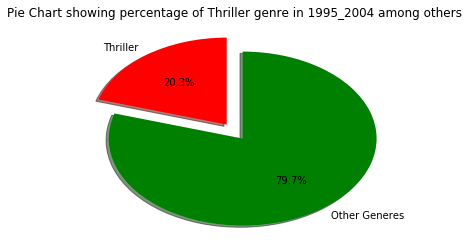

In [64]:
plot_pie_chart_for_a_particular_genres(final_movie_list_1995_2004,'Thriller','1995_2004')

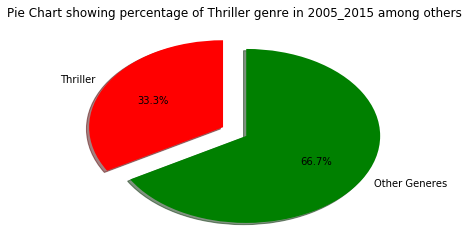

In [65]:
plot_pie_chart_for_a_particular_genres(final_movie_list_2005_2015,'Thriller','2005_2015')